![figure 12.6](assets/12.3_figure_12.6.png)

In [30]:
import numpy as np

TRUE_STATE_VALUES = np.array([
    -9/10,
    -8/10,
    -7/10,
    -6/10,
    -5/10,
    -4/10,
    -3/10,
    -2/10,
    -1/10,
    0,
    1/10,
    2/10,
    3/10,
    4/10,
    5/10,
    6/10,
    7/10,
    8/10,
    9/10,
])

feature_vectors = np.array([
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
])

INITIAL_STATE = 10

def get_next_state_and_reward(state, action):
    if state == 0 and action == 'left':
        return "terminal", -1
    elif state == 18 and action == 'right':
        return "terminal", 1
    elif action == 'left':
        return state - 1, 0
    else:
        return state + 1, 0

def get_action():
    return np.random.choice(['left', 'right'])

def generate_episode():
    episode = []
    state = INITIAL_STATE
    while state != "terminal":
        action = get_action()
        next_state, reward = get_next_state_and_reward(state, action)
        episode.append((state, reward))
        state = next_state
    return episode

def calculate_rms_error(state_values, true_state_values):
    return np.sqrt(np.mean((state_values - true_state_values) ** 2))

def value_function(state, w):
    if state == "terminal":
        return 0
    else:
        return np.dot(w, feature_vectors[state])

def run_learning_td_lambda(alpha, lambda_, gamma, runs=100, episodes=10):
    rms_errors_over_runs = []

    for _ in range(runs):
        w = np.zeros(19)
        rms_errors = []
        for _ in range(episodes):
            state = INITIAL_STATE
            z = np.zeros(19)
            while True:
                action = get_action()
                next_state, reward = get_next_state_and_reward(state, action)
                z = (lambda_ * gamma * z) + np.array([1 if s == state else 0 for s in range(0, 19)])
                delta = reward + gamma * value_function(next_state, w) - value_function(state, w)
                w += alpha * delta * z
                state = next_state
                if state == "terminal":
                    break
            rms_errors.append(calculate_rms_error(w, TRUE_STATE_VALUES))
        rms_errors_over_runs.append(np.mean(rms_errors))

    return np.mean(rms_errors_over_runs)

def run_learning_td_lambda_dutch(alpha, lambda_, gamma, runs=100, episodes=10):
    rms_errors_over_runs = []

    for _ in range(runs):
        w = np.zeros(19)
        rms_errors = []
        for _ in range(episodes):
            state = INITIAL_STATE
            z = np.zeros(19)
            v_old = 0
            while True:
                action = get_action()
                next_state, reward = get_next_state_and_reward(state, action)
                v = value_function(state, w)
                v_prime = value_function(next_state, w)
                delta = reward + gamma * v_prime - v
                x = feature_vectors[state]
                z = (gamma * lambda_ * z) + (1 - alpha * gamma * lambda_ * np.dot(z, x)) * x
                w += alpha * (delta + v - v_old) * z - alpha * (v - v_old) * x
                v_old = v_prime
                state = next_state
                if state == "terminal":
                    break
            rms_errors.append(calculate_rms_error(w, TRUE_STATE_VALUES))
        rms_errors_over_runs.append(np.mean(rms_errors))

    return np.mean(rms_errors_over_runs)

results = run_learning_td_lambda(alpha=0.3, lambda_=0.8, gamma=1.0, runs=100, episodes=10)
print(results)

results = run_learning_td_lambda_dutch(alpha=0.3, lambda_=0.8, gamma=1.0, runs=100, episodes=10)
print(results)


0.26763424271052455
0.27065286060396315


/var/folders/1f/gpv23w7n01x6ppgkwtxfhsx80000gn/T/ipykernel_56255/283595669.py:73: RuntimeWarning: overflow encountered in square
  return np.sqrt(np.mean((state_values - true_state_values) ** 2))
/var/folders/1f/gpv23w7n01x6ppgkwtxfhsx80000gn/T/ipykernel_56255/283595669.py:95: RuntimeWarning: overflow encountered in multiply
  w += alpha * delta * z
/var/folders/1f/gpv23w7n01x6ppgkwtxfhsx80000gn/T/ipykernel_56255/283595669.py:95: RuntimeWarning: overflow encountered in add
  w += alpha * delta * z
/var/folders/1f/gpv23w7n01x6ppgkwtxfhsx80000gn/T/ipykernel_56255/283595669.py:79: RuntimeWarning: invalid value encountered in dot
  return np.dot(w, feature_vectors[state])


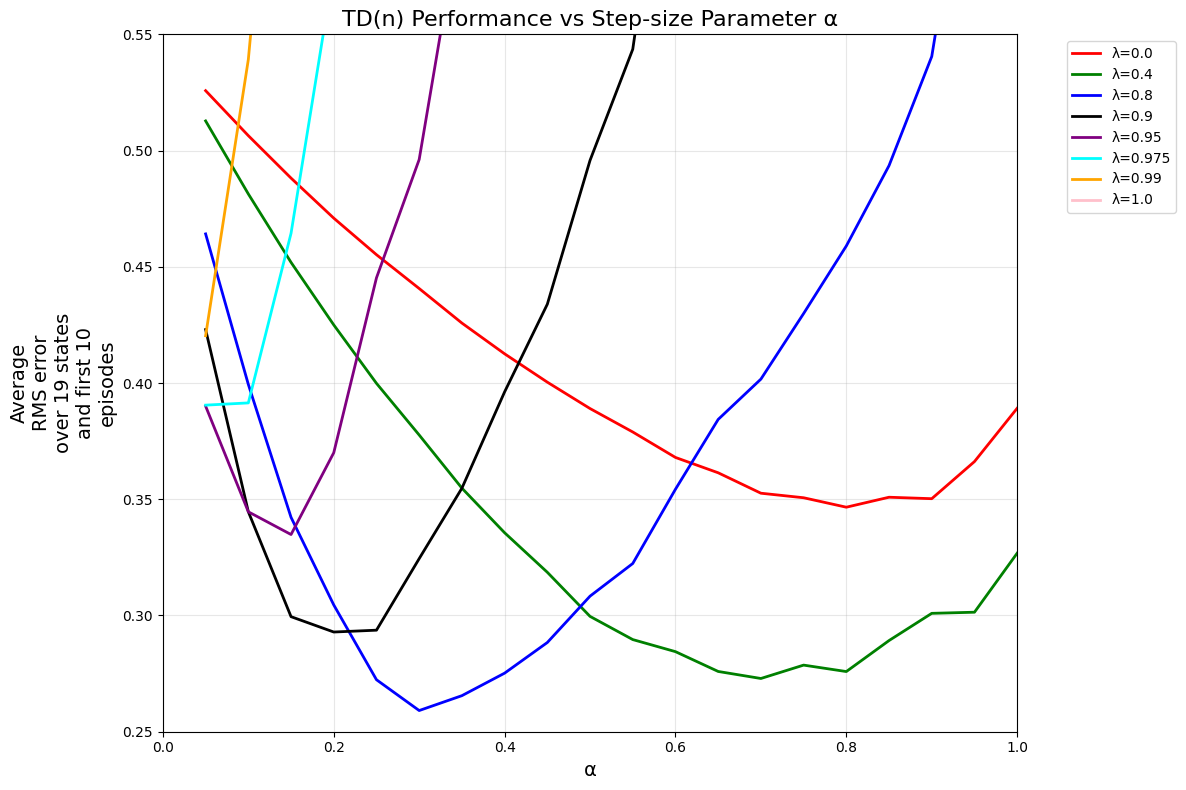

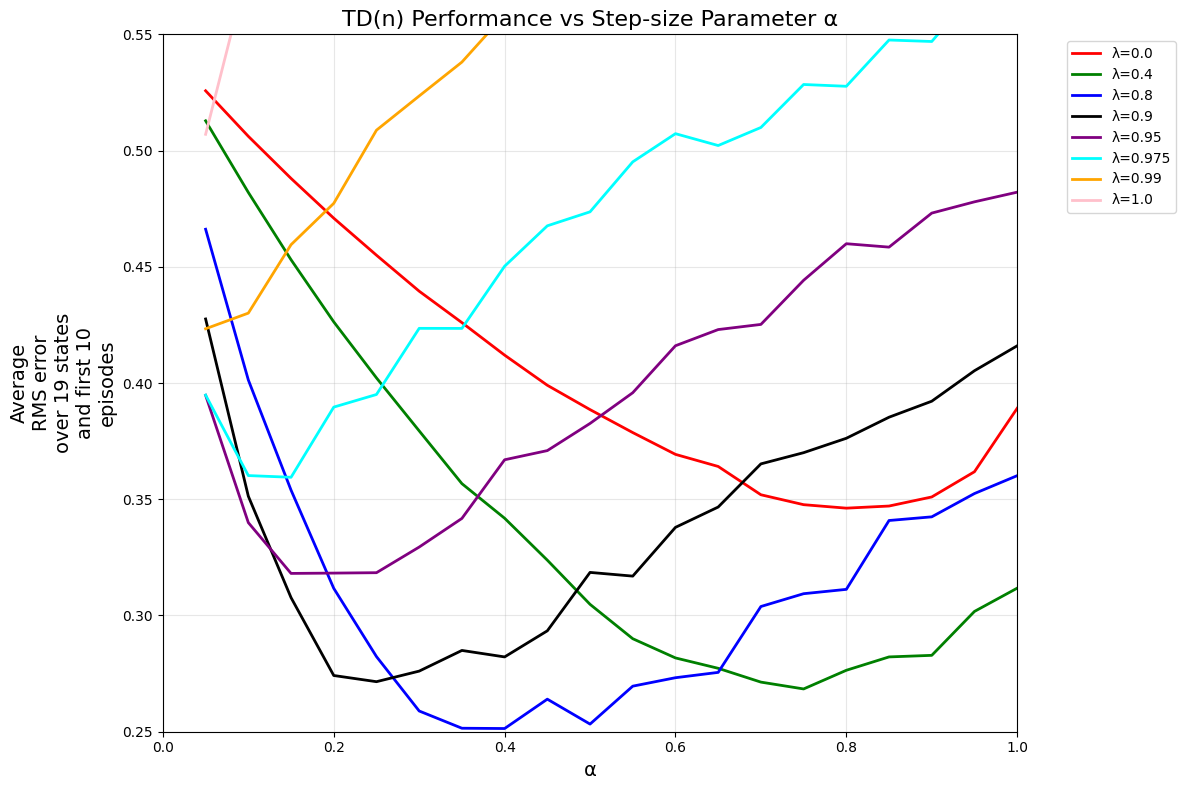

In [31]:
import matplotlib.pyplot as plt

LAMBDAS = [0.0, 0.4, 0.8, 0.9, 0.95, 0.975, 0.99, 1.0]

def generate_graph_data(learning_function):
    alpha_values = np.arange(0.05, 1.05, 0.05)  # Start from 0.05 to avoid alpha=0
    
    results = {}
    
    for lambda_ in LAMBDAS:
        rms_errors = []
        for alpha in alpha_values:
            rms_error = learning_function(alpha=alpha, lambda_=lambda_, gamma=1.0, runs=100, episodes=10)
            rms_errors.append(rms_error)
        results[lambda_] = rms_errors
    
    return alpha_values, results

def plot_graph(alpha_values, results):
    plt.figure(figsize=(12, 8))
    
    colors = ['red', 'green', 'blue', 'black', 'purple', 'cyan', 'orange', 'pink', 'brown', 'gray']
    
    for i, lam in enumerate(LAMBDAS):
        plt.plot(alpha_values, results[lam], label=f'λ={lam}', color=colors[i], linewidth=2)
    
    plt.xlabel('α', fontsize=14)
    plt.ylabel('Average\nRMS error\nover 19 states\nand first 10\nepisodes', fontsize=14)
    plt.title('TD(n) Performance vs Step-size Parameter α', fontsize=16)
    plt.grid(True, alpha=0.3)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xlim(0, 1)
    plt.ylim(0.25, 0.55)
    plt.tight_layout()
    plt.show()

# Generate and plot the data
alpha_values, results = generate_graph_data(run_learning_td_lambda)
plot_graph(alpha_values, results)

alpha_values, results = generate_graph_data(run_learning_td_lambda_dutch)
plot_graph(alpha_values, results)